In [81]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("Data.csv")  

In [ ]:
#importing relevant libraries

In [82]:
df.head()


,A,Gender,TB,DB,Alk,Sgpt,Sgot,TP,ALB,Ratio,Yesno
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [83]:
for col in df.columns:
    df[col].replace({'Yes':1},inplace=True)
    df[col].replace({'No':0},inplace=True)
    df[col].replace({'Female':1},inplace=True)
    df[col].replace({'Male':0},inplace=True)
    df[col].replace({'Male':0},inplace=True)

In [ ]:
#changing relevant strings to binary

In [84]:
df.head()

,A,Gender,TB,DB,Alk,Sgpt,Sgot,TP,ALB,Ratio,Yesno
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

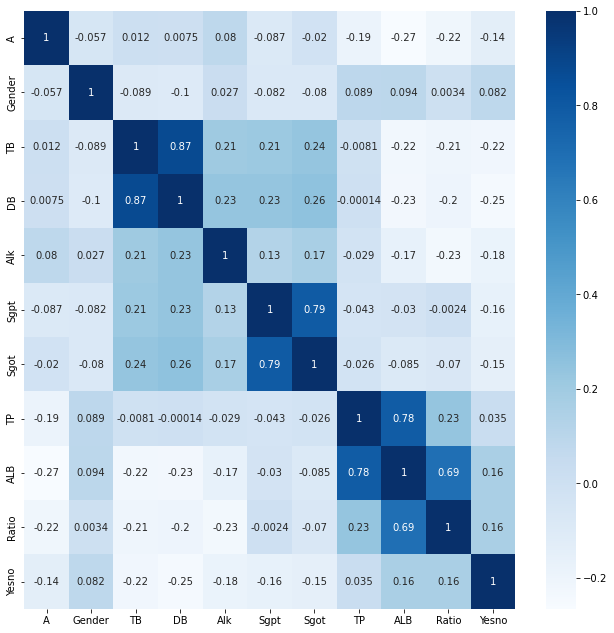

In [85]:
#plotting heatmap for referential feature scaling
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [86]:
x = df.drop('Yesno',axis=1)
x = x.drop('Ratio',axis=1)
y = df['Yesno']

In [134]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Yesno, Length: 583, dtype: int64


In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [ ]:
#creating test split and printing the values

In [88]:
x_train

,A,Gender,TB,DB,Alk,Sgpt,Sgot,TP,ALB
77,68,1,0.6,0.1,1620,95,127,4.6,2.1
581,31,0,1.3,0.5,184,29,32,6.8,3.4
210,28,0,0.8,0.3,190,20,14,4.1,2.4
192,60,0,2.3,0.6,272,79,51,6.6,3.5
449,48,1,0.9,0.2,173,26,27,6.2,3.1
...,...,...,...,...,...,...,...,...,...
71,75,1,0.8,0.2,188,20,29,4.4,1.8
106,36,0,5.3,2.3,145,32,92,5.1,2.6
270,37,0,0.7,0.2,235,96,54,9.5,4.9
435,17,1,0.5,0.1,206,28,21,7.1,4.5


In [89]:
x_test


,A,Gender,TB,DB,Alk,Sgpt,Sgot,TP,ALB
355,19,0,1.4,0.8,178,13,26,8.0,4.6
407,12,0,1.0,0.2,719,157,108,7.2,3.7
90,60,0,5.7,2.8,214,412,850,7.3,3.2
402,42,1,0.5,0.1,162,155,108,8.1,4.0
268,40,0,14.5,6.4,358,50,75,5.7,2.1
...,...,...,...,...,...,...,...,...,...
516,60,0,0.9,0.3,168,16,24,6.7,3.0
305,54,1,1.4,0.7,195,36,16,7.9,3.7
167,47,1,3.0,1.5,292,64,67,5.6,1.8
312,27,0,1.3,0.6,106,25,54,8.5,4.8


In [90]:
y_train


77     1
581    1
210    1
192    1
449    1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Yesno, Length: 466, dtype: int64

In [91]:
y_test

355    2
407    1
90     1
402    1
268    1
      ..
516    1
305    2
167    1
312    2
329    2
Name: Yesno, Length: 117, dtype: int64

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=x_train
Y_train=y_train
X_test=x_test
Y_test=y_test

In [ ]:
#feature scaling(not required here)

In [93]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [95]:
df.isnull().sum()

A         0
Gender    0
TB        0
DB        0
Alk       0
Sgpt      0
Sgot      0
TP        0
ALB       0
Ratio     4
Yesno     0
dtype: int64

In [96]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
#running linear regression on the given dataset

In [97]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [98]:
import numpy as np

In [99]:
np.mean(mse)

-0.19213103326179332

In [152]:
reg_pred=regression.predict(X_test)

In [153]:
reg_pred

array([1.45336355, 1.27928864, 1.0996881 , 1.37661632, 1.10121294,
       1.3064194 , 1.45434017, 1.30931665, 1.5191777 , 1.19494945,
       1.32430346, 1.50898502, 1.38066329, 1.36048473, 0.92568476,
       1.16375634, 1.33019835, 1.3029286 , 1.17564222, 1.28882628,
       1.31222499, 1.32909755, 1.10890411, 1.2337248 , 1.18552753,
       1.29149283, 1.15216931, 1.11837999, 1.37377347, 1.3604357 ,
       1.21560467, 1.3303049 , 1.34343094, 1.30949015, 1.3829716 ,
       1.31824448, 1.09736661, 1.26000303, 1.30913188, 1.03630544,
       1.32367261, 1.48844976, 1.22120902, 1.2951448 , 1.3984043 ,
       1.28569759, 1.48076543, 1.39787523, 1.3902518 , 0.94945901,
       1.36900738, 1.15869887, 1.3558111 , 0.83003118, 1.09577127,
       1.43588552, 1.45491817, 1.49299133, 1.35074989, 1.40379524,
       1.23803677, 1.35806074, 1.40093943, 1.18176586, 1.37164477,
       1.33940741, 1.39265903, 1.17191186, 1.29973388, 1.29486454,
       1.33720637, 0.91279682, 1.20296596, 1.47282899, 0.97513

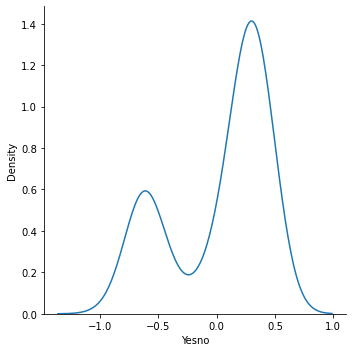

In [154]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [149]:
# for i in (0,116):
#     reg_pred[i]=int(reg_pred[i])

In [151]:
print(reg_pred)

[1.         1.27928864 1.0996881  1.37661632 1.10121294 1.3064194
 1.45434017 1.30931665 1.5191777  1.19494945 1.32430346 1.50898502
 1.38066329 1.36048473 0.92568476 1.16375634 1.33019835 1.3029286
 1.17564222 1.28882628 1.31222499 1.32909755 1.10890411 1.2337248
 1.18552753 1.29149283 1.15216931 1.11837999 1.37377347 1.3604357
 1.21560467 1.3303049  1.34343094 1.30949015 1.3829716  1.31824448
 1.09736661 1.26000303 1.30913188 1.03630544 1.32367261 1.48844976
 1.22120902 1.2951448  1.3984043  1.28569759 1.48076543 1.39787523
 1.3902518  0.94945901 1.36900738 1.15869887 1.3558111  0.83003118
 1.09577127 1.43588552 1.45491817 1.49299133 1.35074989 1.40379524
 1.23803677 1.35806074 1.40093943 1.18176586 1.37164477 1.33940741
 1.39265903 1.17191186 1.29973388 1.29486454 1.33720637 0.91279682
 1.20296596 1.47282899 0.97513702 1.31389306 1.47951202 1.36971642
 1.45420963 1.01821086 1.23047643 1.1550457  1.3997264  0.65107034
 1.31124063 1.20389785 1.54741678 1.21263659 1.24428838 1.36591761

In [158]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

-5.891865308905352

In [170]:
#calculating accuracy score after setting a threshold value
reg_pred1=np.floor(reg_pred)
score=accuracy_score(reg_pred1,y_test)
score

0.6837606837606838

In [121]:
print(y_test)
print(y_train)

355    2
407    1
90     1
402    1
268    1
      ..
516    1
305    2
167    1
312    2
329    2
Name: Yesno, Length: 117, dtype: int64
77     1
581    1
210    1
192    1
449    1
      ..
71     1
106    2
270    1
435    2
102    1
Name: Yesno, Length: 466, dtype: int64


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions =regression.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  0.17051135901077824
mean_absolute_error :  0.3701109079194032


In [110]:
#comparing with svm
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
accuracy_score(y_test, y_pred_svm)

0.7435897435897436

In [106]:
#Logistic Regression

In [107]:
#Calculating logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test,y_pred_log)

0.7692307692307693

In [ ]:
#The logistic regression is a better model since this is a continuous dataset and can also be used to classify 
#the given datset.